In [ ]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 


In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/brain_tumor_dataset/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
result[0]        

array([[1., 0.]])

In [ ]:
paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/brain_tumor_dataset/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape(139,2)
result.shape



(139, 2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        1

In [ ]:
x_train.shape

(111, 128, 128, 3)

In [ ]:
y_train.shape

(111, 2)

In [ ]:
history = model.fit(x_train, y_train,
                   epochs = 40,
                   batch_size = 128,
                   verbose = 1,
                   validation_data = (x_test, y_test))

Epoch 1/40
1/1 [==============================] - 26s 26s/step - loss: 2.1129 - val_loss: 510.0582
Epoch 2/40
1/1 [==============================] - 6s 6s/step - loss: 73.8139 - val_loss: 67.4436
Epoch 3/40
1/1 [==============================] - 6s 6s/step - loss: 19.1932 - val_loss: 135.4640
Epoch 4/40
1/1 [==============================] - 6s 6s/step - loss: 25.8732 - val_loss: 95.8797
Epoch 5/40
1/1 [==============================] - 6s 6s/step - loss: 17.3077 - val_loss: 15.9698
Epoch 6/40
1/1 [==============================] - 6s 6s/step - loss: 6.8045 - val_loss: 37.9793
Epoch 7/40
1/1 [==============================] - 6s 6s/step - loss: 3.9513 - val_loss: 68.5863
Epoch 8/40
1/1 [==============================] - 7s 7s/step - loss: 6.0042 - val_loss: 85.1497
Epoch 9/40
1/1 [==============================] - 6s 6s/step - loss: 6.2071 - val_loss: 84.6191
Epoch 10/40
1/1 [==============================] - 6s 6s/step - loss: 6.3606 - val_loss: 71.5379
Epoch 11/40
1/1 [==============

In [ ]:
 def names(number):
    if number==0:
        return 'a Brain Tumor'
    else:
        return 'No, Its not a tumor'

99.95700716972351% Confident This Is no Tumor in the brain.


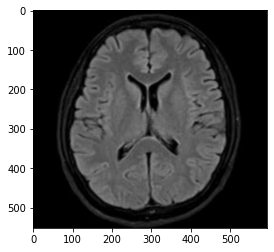

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/brain_tumor_dataset/brain_tumor_dataset/random image/no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confident This Is ' + names(classification))

100.0% Confident that there is a Brain Tumor.


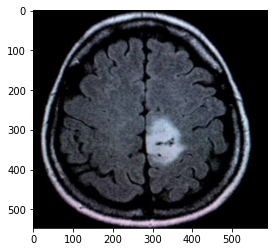

In [ ]:


from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/brain_tumor_dataset/brain_tumor_dataset/random image/yes.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confident that there is ' + names(classification))